/home/codespace/.local/lib/python3.10/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


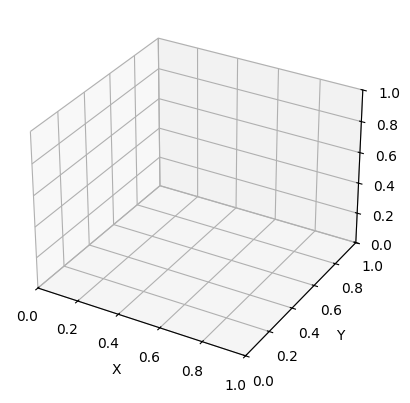

In [5]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def random_walk(num_steps, max_step=0.05):
    """Return a 3D random walk as (num_steps, 3) array."""
    start_pos = np.random.random(3)
    steps = np.random.uniform(-max_step, max_step, size=(num_steps, 3))
    walk = start_pos + np.cumsum(steps, axis=0)
    return walk


def update_lines(num, walks, lines):
    for line, walk in zip(lines, walks):
        line.set_data_3d(walk[:num, :].T)
    return lines


# Data: 40 random walks as (num_steps, 3) arrays
num_steps = 30
walks = [random_walk(num_steps) for index in range(40)]

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Create lines initially without data
lines = [ax.plot([], [], [])[0] for _ in walks]

# Setting the Axes properties
ax.set(xlim3d=(0, 1), xlabel='X')
ax.set(ylim3d=(0, 1), ylabel='Y')
ax.set(zlim3d=(0, 1), zlabel='Z')

# Creating the Animation object
ani = animation.FuncAnimation(
    fig, update_lines, num_steps, fargs=(walks, lines), interval=100)

plt.show()

In [10]:
import matplotlib
matplotlib.use('Agg')  # Use 'Agg' backend for headless environments

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)

def random_walk(num_steps, max_step=0.05):
    """Return a 3D random walk as (num_steps, 3) array."""
    start_pos = np.random.random(3)
    steps = np.random.uniform(-max_step, max_step, size=(num_steps, 3))
    walk = start_pos + np.cumsum(steps, axis=0)
    return walk

def update_lines(num, walks, lines):
    for line, walk in zip(lines, walks):
        line.set_data(walk[:num, 0], walk[:num, 1])
        line.set_3d_properties(walk[:num, 2])
    return lines

# Data: 40 random walks as (num_steps, 3) arrays
num_steps = 30
walks = [random_walk(num_steps) for _ in range(40)]

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create lines initially without data
lines = [ax.plot([], [], [])[0] for _ in walks]

# Setting the Axes properties
ax.set_xlim(0, 1)
ax.set_xlabel('X')
ax.set_ylim(0, 1)
ax.set_ylabel('Y')
ax.set_zlim(0, 1)
ax.set_zlabel('Z')

# Creating the Animation object and assigning it to a variable
anim = animation.FuncAnimation(
    fig, update_lines, frames=num_steps, fargs=(walks, lines), interval=100, blit=True
)

# Save the animation as a video file
#anim.save('random_walks.mp4', writer='ffmpeg', fps=10)
# Alternatively, save as a GIF
anim.save('random_walks.gif', writer='imagemagick', fps=10)


MovieWriter imagemagick unavailable; using Pillow instead.
